# 프로젝트 목적 : 회원 구매율 상승

회원 구매율 정의 : purchase user_id / 전체 user_id *100(%)

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.3 MB/s eta 0:00:00


In [3]:
# 먼저 전처리가 끝난 파일을 불러오자

path = '/content/drive/MyDrive/Colab Notebooks/DA(AI)/kaggle_cosmetics/kaggle_preprocessing_data.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19240686 entries, 0 to 19240685
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ GB


## 지표 설정을 위한 퍼널 분석

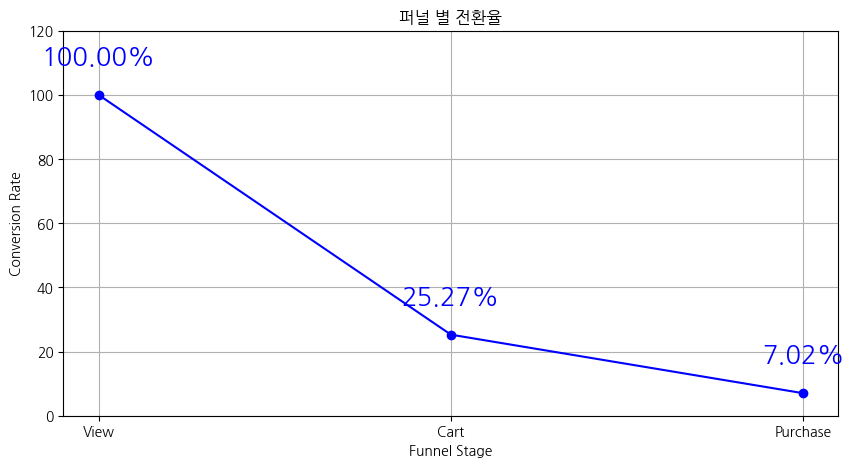

In [ ]:
# 각 이벤트 타입별 유저 수 계산
view_users = df1[df1['event_type'] == 'view']['user_id'].nunique()
cart_users = df1[df1['event_type'] == 'cart']['user_id'].nunique()
purchase_users = df1[df1['event_type'] == 'purchase']['user_id'].nunique()

# 전환율 계산
view_conversion_rate = view_users / view_users *100
cart_conversion_rate = cart_users / view_users *100
purchase_conversion_rate = purchase_users / view_users *100

conversion_rates = [view_conversion_rate, cart_conversion_rate, purchase_conversion_rate]

# 퍼널 단계 이름
funnel_stages = ['View', 'Cart', 'Purchase']

# 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 5))
plt.plot(funnel_stages, conversion_rates, marker='o', linestyle='-', color='b')
plt.title('퍼널 별 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate')
plt.ylim(0, 120)  # 전환율(%)이므로 y축 범위를 0부터 100로 설정(100이 보이게 하기 위해 120로)

for i, txt in enumerate(conversion_rates):
    plt.text(funnel_stages[i], conversion_rates[i] + 8, f"{txt:.2f}%", ha='center', va='bottom', fontsize=18.5, color='blue')

plt.grid(True)
plt.show()

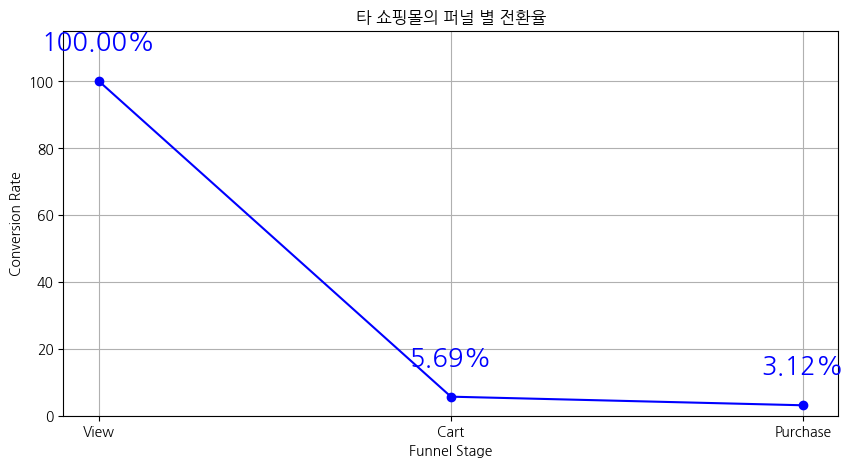

In [ ]:
#타 쇼핑몰 전환율 계산
other_vcr = 66.08 / 66.08 *100
othrer_ccr = 3.76 / 66.08 *100
other_pcr = 2.06 / 66.08 *100

conversion_rates = [other_vcr, othrer_ccr, other_pcr]

# 퍼널 단계 이름
funnel_stages = ['View', 'Cart', 'Purchase']

# 꺾은선 그래프로 시각화
plt.figure(figsize=(10, 5))
plt.plot(funnel_stages, conversion_rates, marker='o', linestyle='-', color='b')
plt.title('타 쇼핑몰의 퍼널 별 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate')
plt.ylim(0, 115)

for i, txt in enumerate(conversion_rates):
    plt.text(funnel_stages[i], conversion_rates[i] + 8, f"{txt:.2f}%", ha='center', va='bottom', fontsize=18.5, color='blue')

plt.grid(True)
plt.show()

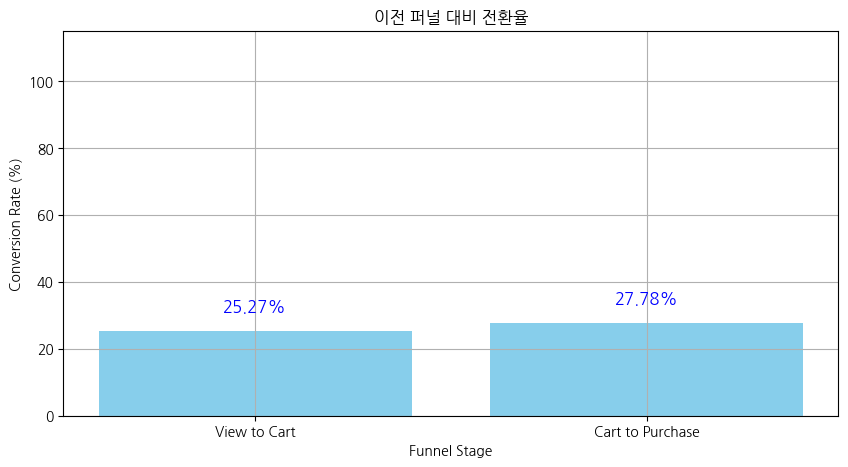

In [ ]:
# 이전 퍼널 대비 전환율
view_to_cart_cvr = cart_users / view_users *100
cart_to_purchase_cvr = purchase_users / cart_users *100

conversion_rates = [view_to_cart_cvr, cart_to_purchase_cvr]

# 퍼널 단계 이름
funnel_stages = ['View to Cart', 'Cart to Purchase']

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(funnel_stages, conversion_rates, color='skyblue')
plt.title('이전 퍼널 대비 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 115)

# 각 막대에 전환율 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=12, color='blue')

plt.grid(True)
plt.show()

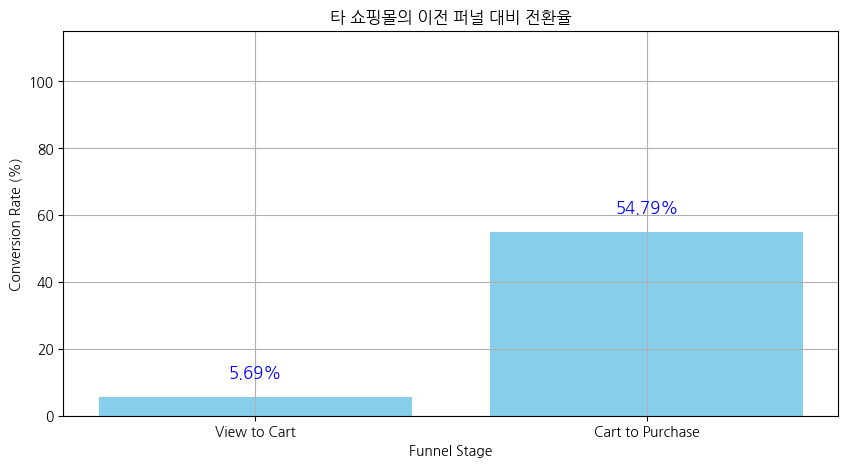

In [ ]:
#타 쇼핑몰 전환율 계산
othrer_ccr = 3.76 / 66.08 *100
other_pcr = 2.06 / 3.76 *100

conversion_rates = [othrer_ccr, other_pcr]

# 퍼널 단계 이름
funnel_stages = ['View to Cart', 'Cart to Purchase']

# 막대 그래프로 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(funnel_stages, conversion_rates, color='skyblue')
plt.title('타 쇼핑몰의 이전 퍼널 대비 전환율')
plt.xlabel('Funnel Stage')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 115)

# 각 막대에 전환율 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{yval:.2f}%", ha='center', va='bottom', fontsize=12, color='blue')

plt.grid(True)
plt.show()

### 지표 설정 : 장바구니 구매 전환율(cart to purchase)

## 현상 파악

장바구니 구매 전환율의 현상 파악을 위해 월 별로 살펴보자

In [6]:
# 날짜 컬럼을 사용하기 위해 d-type을 datetime으로 바꾸기

df1['event_time'] = pd.to_datetime(df1['event_time'])

In [ ]:
df1['event_month'] = df1['event_time'].dt.month

In [ ]:
df1_1 = df1[df1['event_month']== 10]
df1_2 = df1[df1['event_month']== 11]
df1_3 = df1[df1['event_month']== 12]
df1_4 = df1[df1['event_month']== 1]
df1_5 = df1[df1['event_month']== 2]

In [ ]:
# 월 별 장바구니 구매 전환율 함수

def cvr_plot(df):
  view_users = df[df['event_type'] == 'view']['user_id'].nunique()
  cart_users = df[df['event_type'] == 'cart']['user_id'].nunique()
  purchase_users = df[df['event_type'] == 'purchase']['user_id'].nunique()

  # 전환율 계산
  cart_to_purchase_cvr = purchase_users / cart_users *100

  return cart_to_purchase_cvr

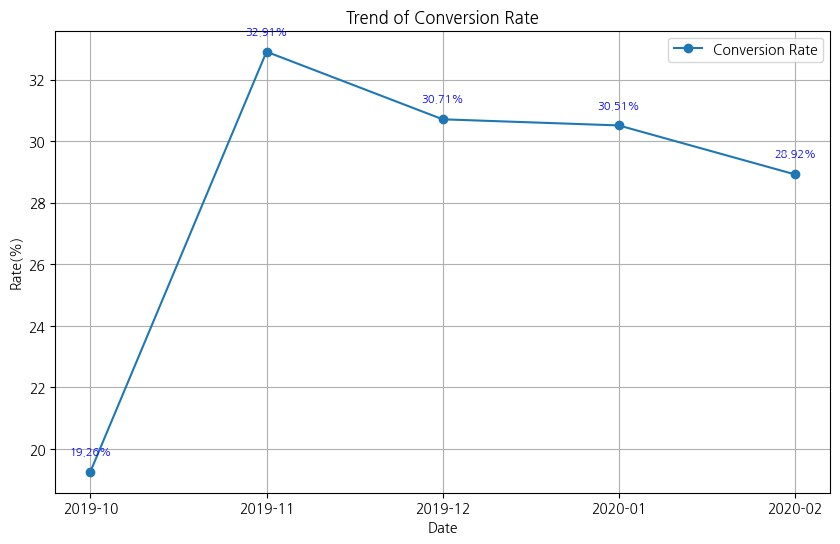

In [ ]:
## 그래프 시각화

cvr_values = []

for i, df in enumerate([df1_1, df1_2, df1_3, df1_4, df1_5]):
    cvr = cvr_plot(df)
    cvr_values.append(cvr)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cvr_values, marker='o', label='Conversion Rate')
plt.xticks(range(1, 6), ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02'])
plt.xlabel('Date')
plt.ylabel('Rate(%)')
plt.title('Trend of Conversion Rate')
plt.legend()

for i, cvr in enumerate(cvr_values):
    plt.text(i + 1, cvr + 0.5, f'{cvr:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')

plt.grid(True)
plt.show()

- 2019.10월의 데이터가 현저히 적다. cart자체가 적은 것인지, purchase로의 전환이 적은 것인지 확인해보자

In [ ]:
# 월 별 cart와 purchase의 데이터 확인해보기

def event_user(df):
  view_users = df[df['event_type'] == 'view']['user_id'].nunique()
  cart_users = df[df['event_type'] == 'cart']['user_id'].nunique()
  purchase_users = df[df['event_type'] == 'purchase']['user_id'].nunique()

  return cart_users, purchase_users

results = []
dataframes = [df1_1, df1_2, df1_3, df1_4, df1_5]
months = ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02']

for df, month in zip(dataframes, months):
    cart_users, purchase_users = event_user(df)
    results.append((month, cart_users, purchase_users))

# 출력
results_df = pd.DataFrame(results, columns=['Date', 'Cart Users', 'Purchase Users'])
results_df

,Date,Cart Users,Purchase Users
0,2019-10,132779,25577
1,2019-11,95229,31338
2,2019-12,82738,25411
3,2020-01,91871,28033
4,2020-02,88397,25567


In [ ]:
def event_user2(df):
    cart_users = set(df[df['event_type'] == 'cart']['user_id'].unique())
    purchase_users = set(df[df['event_type'] == 'purchase']['user_id'].unique())

    users_in_both = cart_users.intersection(purchase_users)

    return len(users_in_both)

results = []
dataframes = [df1_1, df1_2, df1_3, df1_4, df1_5]
months = ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02']

for df, month in zip(dataframes, months):
    users_in_both = event_user2(df)
    results.append((month, users_in_both))
# 출력
results_df2 = pd.DataFrame(results, columns=['Date', 'Cart&Purchase Users'])
results_df2

,Date,Cart&Purchase Users
0,2019-10,25231
1,2019-11,30907
2,2019-12,25083
3,2020-01,27675
4,2020-02,25161


## 평가

### 1.내부평가

In [ ]:
# 장바구니 제거 전환율

def cvr_plot2(df):
  view_users = df[df['event_type'] == 'view']['user_id'].nunique()
  cart_users = df[df['event_type'] == 'cart']['user_id'].nunique()
  purchase_users = df[df['event_type'] == 'purchase']['user_id'].nunique()
  remove_cart_users = df[df['event_type'] == 'remove_from_cart']['user_id'].nunique()

  # 전환율 계산
  cart_to_purchase_cvr = purchase_users / cart_users *100
  cart_to_remove_cvr = remove_cart_users / cart_users *100

  return cart_to_purchase_cvr, cart_to_remove_cvr

In [ ]:
cvr_plot2(df1)

(27.775892459175815, 46.047246646946796)

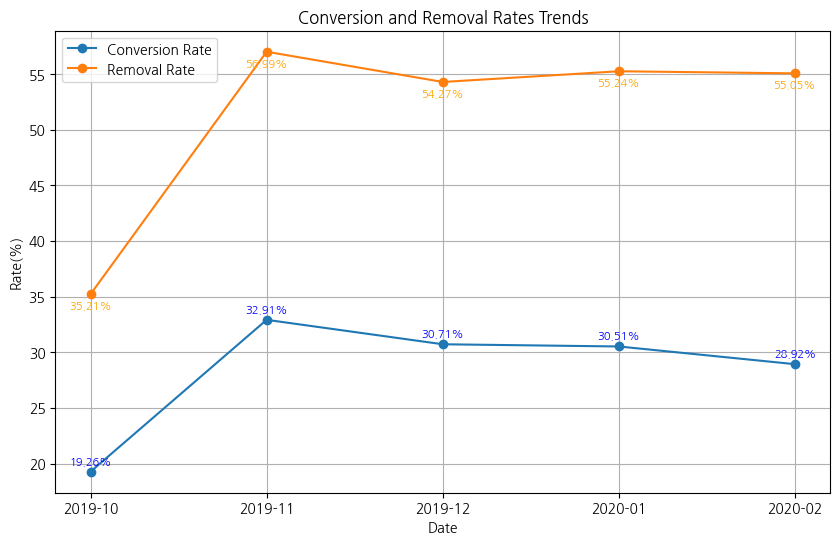

In [ ]:
# 장바구니 제거 전환율과 구매 전환율을 한 번 비교해보자.

cvr_values = []
de_cvr_values = []

for i, df in enumerate([df1_1, df1_2, df1_3, df1_4, df1_5]):
    cvr, de_cvr = cvr_plot2(df)
    cvr_values.append(cvr)
    de_cvr_values.append(de_cvr)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cvr_values, marker='o', label='Conversion Rate')
plt.plot(range(1, 6), de_cvr_values, marker='o', label='Removal Rate')
plt.xticks(range(1, 6), ['2019-10', '2019-11', '2019-12', '2020-01', '2020-02'])
plt.xlabel('Date')
plt.ylabel('Rate(%)')
plt.title('Conversion and Removal Rates Trends')
plt.legend()

for i, (cvr, de_cvr) in enumerate(zip(cvr_values, de_cvr_values)):
    plt.text(i + 1, cvr + 0.5, f'{cvr:.2f}%', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i + 1, de_cvr - 0.5, f'{de_cvr:.2f}%', ha='center', va='top', fontsize=8, color='orange')

plt.grid(True)
plt.show()

- 미세한 차이이나, 장바구니 제거 전환율의 경우에는 2020-01월에 증가한다.

월별 event 발생 건수 추세와 확인해보자

<ipython-input-20-5af2eeb1d438>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1['event_month'] = df1['event_time'].dt.to_period('M').dt.to_timestamp()


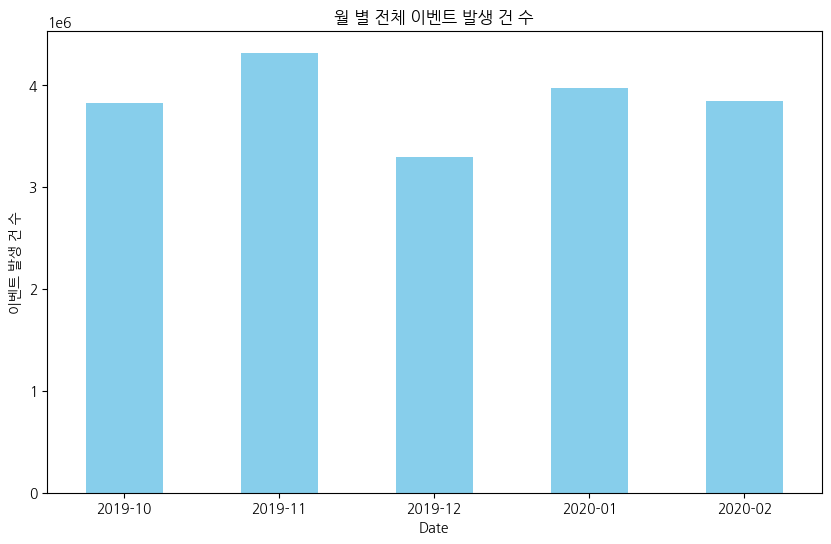

In [ ]:
# 월 별 이벤트 발생 건 수 계산
df1['event_month'] = df1['event_time'].dt.to_period('M').dt.to_timestamp()
monthly_events = df1.groupby(['event_month', 'event_type']).size().unstack(fill_value=0)

monthly_events.sum(axis=1).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('월 별 전체 이벤트 발생 건 수')
plt.xlabel('Date')
plt.ylabel('이벤트 발생 건 수')
plt.xticks(rotation=0)

plt.gca().set_xticklabels([pd.to_datetime(tm).strftime('%Y-%m') for tm in monthly_events.index])

plt.show()

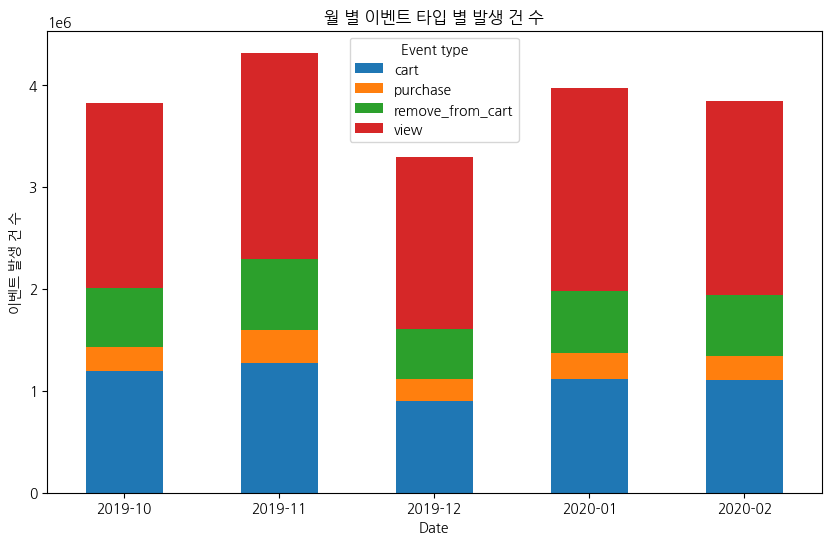

In [ ]:
# 월 별 이벤트 타 입별 발생 건 수 시각화
monthly_events.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('월 별 이벤트 타입 별 발생 건 수')
plt.xlabel('Date')
plt.ylabel('이벤트 발생 건 수')
plt.xticks(rotation=0)
plt.legend(title='Event type')
plt.gca().set_xticklabels([pd.to_datetime(tm).strftime('%Y-%m') for tm in monthly_events.index])
plt.show()

In [ ]:
# 위 시각화를 숫자로 확인해보자
monthly_events

event_type,cart,purchase,remove_from_cart,view
event_month,,,,
2019-10-01,1190809,241988,572010,1818922
2019-11-01,1275382,318286,694814,2027084
2019-12-01,901187,210347,491670,1689479
2020-01-01,1114449,259763,603500,1989423
2020-02-01,1104749,238443,596163,1902218


## 요인 분석

### 1. 장바구니 구매 전환율이 감소하는 이유가 뭘까?

원인 후보와 해당 지표를 설정한 뒤 알아보자

#### 후보1. 장바구니 상품을 잊어버림 → 카트 후 제거or구매로 장바구니 후 재방문기간 근사치 확인

In [14]:
# `event_time` 열의 시간대 정보를 제거
df1['event_time'] = df1['event_time'].dt.tz_localize(None)

# 최초 'cart' 이벤트를 기준으로 코호트 할당
# 'event_type' 열이 'cart'인 행만 필터링
cart_events = df1[df1['event_type'] == 'cart']

# 각 사용자별 최초 장바구니 추가 이벤트 시간 계산
first_cart_time = cart_events.groupby('user_id')['event_time'].min().reset_index()
first_cart_time.rename(columns={'event_time': 'first_cart_time'}, inplace=True)

# 원본 데이터프레임에 최초 장바구니 추가 시간 병합
df1 = pd.merge(df1, first_cart_time, on='user_id', how='left')

# 코호트를 월 단위로 할당
df1['cohort'] = df1['first_cart_time'].dt.to_period('M')

# 코호트 시작일 계산
df1['cohort_start'] = df1['cohort'].dt.start_time

# 최초 구매 또는 장바구니에서 제거 이벤트 발생일 계산
# 'purchase' 또는 'remove_from_cart' 이벤트를 필터링
df1_filtered = df1[df1['event_type'].isin(['purchase', 'remove_from_cart'])]

# 각 사용자별로 위 이벤트 중 최초 발생시간 계산
first_event_time_after_cart = df1_filtered.groupby('user_id')['event_time'].min().reset_index()
first_event_time_after_cart.rename(columns={'event_time': 'first_event_time_after_cart'}, inplace=True)

# 원본 데이터프레임에 병합
df1 = pd.merge(df1, first_event_time_after_cart, on='user_id', how='left')

# 코호트 시작일로부터 최초 'purchase' 또는 'remove_from_cart' 이벤트 발생일까지의 일수 계산
df1['period_number'] = (df1['first_event_time_after_cart'] - df1['cohort_start']).dt.days

# 코호트 시작 월 및 이벤트 발생 일자별 고유 사용자 수 계산
df1_cohort = df1.groupby(['cohort', 'period_number']).agg(n_customers=('user_id', 'nunique')).reset_index()

# 피벗 테이블 생성
cohort_pivot = df1_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers', aggfunc='sum')

cohort_pivot

period_number,-123.0,-122.0,-121.0,-120.0,-119.0,-118.0,-117.0,-116.0,-115.0,-114.0,...,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,9.0,9.0,4.0,11.0,18.0,17.0,10.0,10.0,4.0
2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,3.0,3.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 코호트 시작 월 및 이벤트 발생 일자별 고유 사용자 수 계산
df1_cohort = df1.groupby(['cohort', 'period_number']).agg(n_customers=('user_id', 'nunique')).reset_index()

# 음수 'period_number' 값을 가진 행 제외
df1_cohort = df1_cohort[df1_cohort['period_number'] >= 0]

# 피벗 테이블 생성
cohort_pivot = df1_cohort.pivot_table(index='cohort', columns='period_number', values='n_customers', aggfunc='sum')

cohort_pivot

period_number,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0
cohort,,,,,,,,,,,,,,,,,,,,,
2019-10,2638.0,2373.0,2136.0,1822.0,1476.0,1737.0,2148.0,1948.0,1951.0,1651.0,...,7.0,9.0,9.0,4.0,11.0,18.0,17.0,10.0,10.0,4.0
2019-11,981.0,1010.0,1104.0,1231.0,1277.0,1248.0,1666.0,1414.0,1020.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12,847.0,1030.0,1023.0,1100.0,995.0,963.0,859.0,1052.0,1233.0,1204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01,539.0,711.0,810.0,910.0,975.0,845.0,920.0,1074.0,1182.0,1011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,854.0,1090.0,1147.0,1108.0,1084.0,1060.0,1006.0,851.0,1072.0,1151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


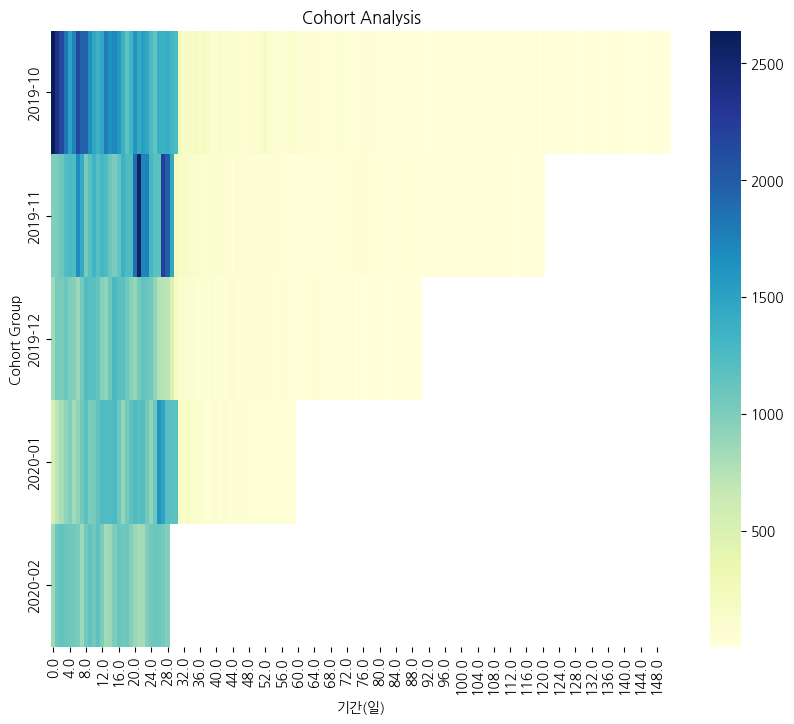

In [18]:
# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cohort_pivot, annot=False, cmap='YlGnBu')
plt.title('Cohort Analysis')
plt.ylabel('Cohort Group')
plt.xlabel('기간(일)')
plt.show()

#### 후보2. 갖고 싶어서 카트에 넣었으나, 가격으로 인한 고민 → 장바구니 후 제거, 구매의 가격대확인

In [10]:
## event_type 별 가격대 top 5 확인하기

cart_price = df1[df1['event_type'] == 'cart']['price']
top5_cart_price = cart_price.value_counts().head(5)

purchase_price = df1[df1['event_type'] == 'purchase']['price']
top5_purchase_price = purchase_price.value_counts().head(5)

remove_price = df1[df1['event_type'] == 'remove_from_cart']['price']
top5_remove_price = remove_price.value_counts().head(5)

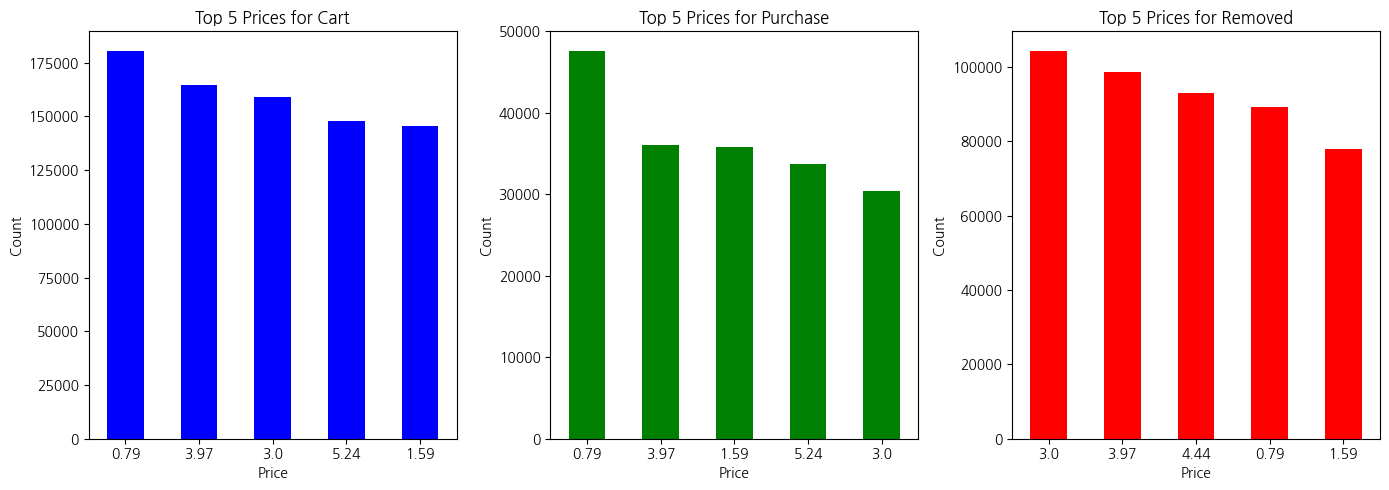

In [11]:
# 시각화
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# 장바구니 상품의 상위 5개 가격대 시각화
top5_cart_price.plot(kind='bar', ax=ax[0], color='blue')
ax[0].set_title('Top 5 Prices for Cart')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=0)

# 구매한 상품의 상위 5개 가격대 시각화
top5_purchase_price.plot(kind='bar', ax=ax[1], color='green')
ax[1].set_title('Top 5 Prices for Purchase')
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=0)

# 장바구니에서 제거된 상품의 상위 5개 가격대 시각화
top5_remove_price.plot(kind='bar', ax=ax[2], color='red')
ax[2].set_title('Top 5 Prices for Removed')
ax[2].set_xlabel('Price')
ax[2].set_ylabel('Count')
ax[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

- 각 이벤트 별 top5 가격대를 확인해보았다.

이제, cart에서 purchase와 remove_from_cart로 넘어간 상품의 top5 가격대를 확인해보자

In [13]:
# 상관도 확인하기

# event_type에 따른 점수 매핑
event_score_mapping = {
    'view': 0,
    'cart': 0,
    'remove_from_cart': -1,
    'purchase': 1
}

# event_type을 점수로 변환
df['event_score'] = df['event_type'].map(event_score_mapping)

# 상관 계수 계산
correlation = df[['price', 'event_score']].corr()

correlation

,price,event_score
price,1.000000,0.030315
event_score,0.030315,1.000000


- 카운트로 확인하니 가격이 미친 영향을 확인하기 어렵다. 비율로 확인해보자